<a href="https://colab.research.google.com/github/yoonkei/Mining/blob/main/%EB%B6%84%EB%A5%98%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2020년도 건강검진정보 샘플(1만건) 데이터를 이용하여 최적의 분류 모델을 만들고 평가 결과 및 도출된 인사이트를 보여주시오. 

(1) 흥미로운 분류 문제 선정: 종속/독립 변수 선택 
- 수치 데이터를 범주형으로 변경 가능 (예. 이진 클래스로 변경: 0.5 이상 Y, 0.5 미만 N)
- 건강검진 데이터에 다른 외부 데이터를 연결해서 이용도 가능
- 필요한 경우 데이터 전처리 및 파생변수 생성 

(2) 최적의 분류 모델 선택 (분류 기법, 파라미터) 및 평가 결과 
   - 적절한 평가 방법 1개 선택 
   - 분류 모델의 종류는 3개 이하로 선택, 수업시간에 배우지 않은 분류 모델도 사용 가능

(3) 분류 모델을 통한 인사이트 도출:  중요 변수 설명 등
  
(4) 코드는 github에 올리고 주소 제출

# 데이터 분석 준비하기

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


패키지 설치 및 로드하기

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

한글 폰트 설치하기

In [3]:
plt.rc('font', family='NanumBarunGothic')

In [4]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [5]:
%matplotlib inline
import matplotlib as mpl              
import matplotlib.pyplot as plt        
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False
fm._rebuild()

데이터 불러오기

In [6]:
raw_health = pd.read_csv("/content/drive/My Drive/Mining/health_data.csv", encoding='UTF8')
health = raw_health.copy()

## 데이터 검토하기

In [7]:
health

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,1.2,1.2,...,0.7,20.0,21.0,20.0,No,Yes,0,NaN,NaN,12/29/2021
9996,2020,9997,43,F,11,160,55,77.5,1.0,1.2,...,0.7,24.0,22.0,21.0,No,Yes,1,0.0,0.0,12/29/2021
9997,2020,9998,45,M,12,160,80,93.0,0.6,0.6,...,1.0,22.0,27.0,35.0,No,No,0,NaN,NaN,12/29/2021
9998,2020,9999,27,F,15,155,55,78.0,0.6,1.0,...,1.0,26.0,24.0,21.0,No,No,0,NaN,NaN,12/29/2021


In [8]:
health.shape

(10000, 31)

In [9]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [10]:
health.describe

<bound method NDFrame.describe of       기준년도  가입자일련번호  시도코드 성별코드  연령대코드(5세단위)  신장(5Cm단위)  체중(5Kg 단위)   허리둘레  \
0     2020        1    36    M            9        165          60   72.1   
1     2020        2    27    F           13        150          65   81.0   
2     2020        3    11    F           12        155          55   70.0   
3     2020        4    31    M           13        160          70   90.8   
4     2020        5    41    F           12        155          50   75.2   
...    ...      ...   ...  ...          ...        ...         ...    ...   
9995  2020     9996    44    F           13        155          55   83.0   
9996  2020     9997    43    F           11        160          55   77.5   
9997  2020     9998    45    M           12        160          80   93.0   
9998  2020     9999    27    F           15        155          55   78.0   
9999  2020    10000    45    F           13        160          75  100.0   

      시력(좌)  시력(우)  ...  혈청크레아티닌  (혈청지오티)

# 결측치 제거하기

# 새 변수 만들기

신체질량지수 = 체중(단위: kg % 신장(단위:m)의 제곱

In [11]:
health['신체질량지수'] = health['체중(5Kg 단위)'] / (health ['신장(5Cm단위)']/100 * health ['신장(5Cm단위)']/100) 
health.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,신체질량지수
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021,22.038567
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021,28.888889
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021,22.892820
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021,27.343750
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021,20.811655


  비만 =  20세 이상의 성인은 신체질량지수가 25이상이면 비만

In [12]:
health['비만'] = np.where(health['신체질량지수'] >= 25.0, 'Yes', 'No')
health.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,신체질량지수,비만
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,27.0,21.0,No,No,0,NaN,NaN,12/29/2021,22.038567,No
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,15.0,15.0,No,No,0,NaN,NaN,12/29/2021,28.888889,Yes
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,25.0,7.0,No,No,0,NaN,NaN,12/29/2021,22.892820,No
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,97.0,72.0,No,No,1,0.0,0.0,12/29/2021,27.343750,Yes
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,17.0,14.0,No,No,0,NaN,NaN,12/29/2021,20.811655,No


당뇨 = 식전혈당이 126 mg/dL 이상이면 당뇨

In [13]:
health['당뇨'] = np.where(health['식전혈당(공복혈당)'] >= 126, 'Yes', 'No')
health.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,신체질량지수,비만,당뇨
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,21.0,No,No,0,NaN,NaN,12/29/2021,22.038567,No,No
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,15.0,No,No,0,NaN,NaN,12/29/2021,28.888889,Yes,No
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,7.0,No,No,0,NaN,NaN,12/29/2021,22.892820,No,No
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,72.0,No,No,1,0.0,0.0,12/29/2021,27.343750,Yes,Yes
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,14.0,No,No,0,NaN,NaN,12/29/2021,20.811655,No,No


# 성인 당뇨병 예측 모델 


## 데이터 전처리

### 변수 속성 파악하기

In [14]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

### 필요한 변수만 추출
성인 당뇨병 예측 모델을 만들고자 하니, 20세 이상의 데이터만 추출

In [15]:
health = health.rename(columns = {'연령대코드(5세단위)' : 'AGE'})
adult_health = health.query('AGE >= 5')

In [16]:
adult_health #10000명 전원이 성인임

,기준년도,가입자일련번호,시도코드,성별코드,AGE,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,신체질량지수,비만,당뇨
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,21.0,No,No,0,NaN,NaN,12/29/2021,22.038567,No,No
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,15.0,No,No,0,NaN,NaN,12/29/2021,28.888889,Yes,No
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,7.0,No,No,0,NaN,NaN,12/29/2021,22.892820,No,No
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,72.0,No,No,1,0.0,0.0,12/29/2021,27.343750,Yes,Yes
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,14.0,No,No,0,NaN,NaN,12/29/2021,20.811655,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,1.2,1.2,...,20.0,No,Yes,0,NaN,NaN,12/29/2021,22.892820,No,No
9996,2020,9997,43,F,11,160,55,77.5,1.0,1.2,...,21.0,No,Yes,1,0.0,0.0,12/29/2021,21.484375,No,No
9997,2020,9998,45,M,12,160,80,93.0,0.6,0.6,...,35.0,No,No,0,NaN,NaN,12/29/2021,31.250000,Yes,No
9998,2020,9999,27,F,15,155,55,78.0,0.6,1.0,...,21.0,No,No,0,NaN,NaN,12/29/2021,22.892820,No,No


예측변수와 타켓변수로 사용할 성별, 나이, 음주, 비만, 식전 혈당 데이터만 추출

In [17]:
adult_health2 = adult_health[['성별코드', 'AGE', '음주여부', '비만', '당뇨']]

In [18]:
adult_health2

,성별코드,AGE,음주여부,비만,당뇨
0,M,9,No,No,No
1,F,13,No,Yes,No
2,F,12,No,No,No
3,M,13,No,Yes,Yes
4,F,12,No,No,No
...,...,...,...,...,...
9995,F,13,Yes,No,No
9996,F,11,Yes,No,No
9997,M,12,No,Yes,No
9998,F,15,No,No,No


### 타겟변수 전처리

In [19]:
adult_health2['당뇨'].value_counts(normalize = True)

No     0.8993
Yes    0.1007
Name: 당뇨, dtype: float64

#### 결측치 제거

In [20]:
adult_health2 = adult_health2.dropna()

#### 원핫인코딩

타겟변수인 당뇨를 제외하고, 문자 타입 변수들은 다 숫자 타입으로 변환

In [21]:
target = adult_health2['당뇨']

In [22]:
adult_health2 = adult_health2.drop(columns = '당뇨')
adult_health2 = pd.get_dummies(adult_health2)

In [23]:
adult_health2['당뇨'] = target
adult_health2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   AGE       9999 non-null   int64 
 1   성별코드_F    9999 non-null   uint8 
 2   성별코드_M    9999 non-null   uint8 
 3   음주여부_No   9999 non-null   uint8 
 4   음주여부_Yes  9999 non-null   uint8 
 5   비만_No     9999 non-null   uint8 
 6   비만_Yes    9999 non-null   uint8 
 7   당뇨        9999 non-null   object
dtypes: int64(1), object(1), uint8(6)
memory usage: 292.9+ KB


In [24]:
adult_health2.info(max_cols = np.inf)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   AGE       9999 non-null   int64 
 1   성별코드_F    9999 non-null   uint8 
 2   성별코드_M    9999 non-null   uint8 
 3   음주여부_No   9999 non-null   uint8 
 4   음주여부_Yes  9999 non-null   uint8 
 5   비만_No     9999 non-null   uint8 
 6   비만_Yes    9999 non-null   uint8 
 7   당뇨        9999 non-null   object
dtypes: int64(1), object(1), uint8(6)
memory usage: 292.9+ KB


## 크로스 밸리데이션

트레이닝 세트와 테스트 세트로 데이터 분할하기

In [25]:
from sklearn.model_selection import train_test_split
adult_health2_train, adult_health2_test = train_test_split(
    adult_health2,
    test_size=0.2,
    stratify = adult_health2['당뇨'],
    random_state=1234)

test set

In [26]:
adult_health2_test.shape

(2000, 8)

In [27]:
adult_health2_test['당뇨'].value_counts(normalize = True)

No     0.8995
Yes    0.1005
Name: 당뇨, dtype: float64

trian set

In [28]:
adult_health2_train.shape

(7999, 8)

In [29]:
adult_health2_train['당뇨'].value_counts(normalize = True)

No     0.899237
Yes    0.100763
Name: 당뇨, dtype: float64

## 의사결정나무

### 모델 설정하기

In [42]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state = 6420, max_depth = 4)

### 모델 만들기

In [43]:
train_x = adult_health2_train.drop(columns = '당뇨')
train_y = adult_health2_train['당뇨']

In [44]:
model = clf.fit(X = train_x, y = train_y)

### 모델구조 살펴보기

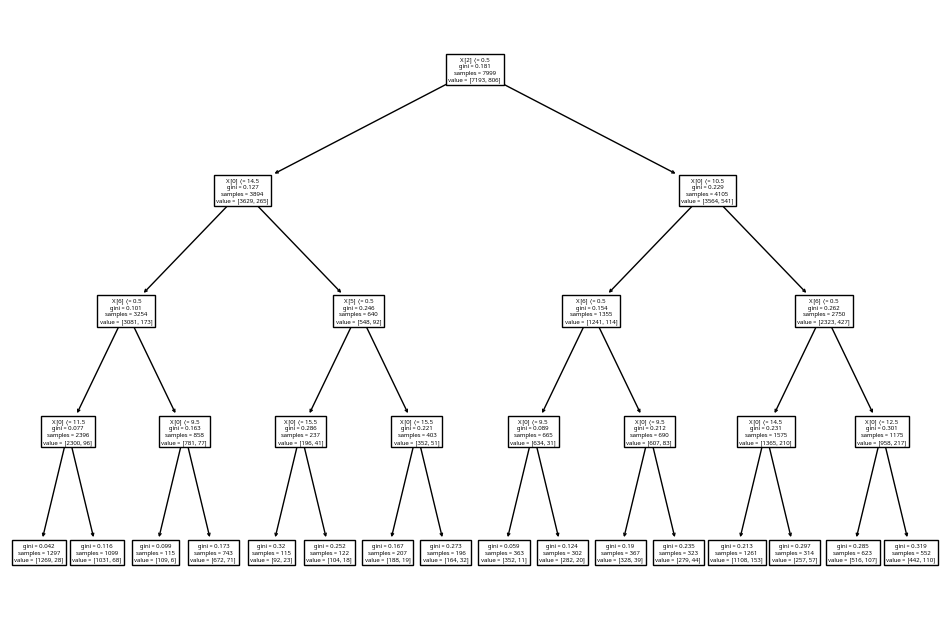

In [45]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize' : [12, 8], 'figure.dpi' : '100'})
tree.plot_tree(model);

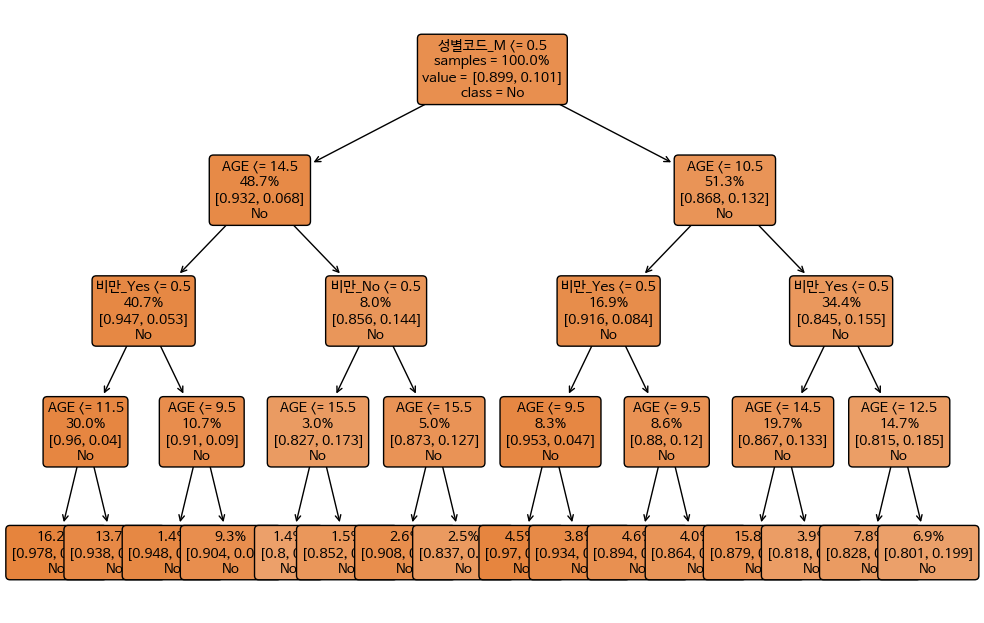

In [46]:
tree.plot_tree(model,
               feature_names = train_x.columns,
               class_names = ['No', 'Yes'],
               proportion = True,
               filled = True,
               rounded = True,
               impurity = False,
               label = 'root',
               fontsize = 10);

### 모델을 이용해 예측하기

In [52]:
test_x = adult_health2_test.drop(columns = '당뇨')
test_y = adult_health2_test['당뇨']

In [55]:
adult_health2_test['pred'] = model.predict(test_x)
adult_health2_test

,AGE,성별코드_F,성별코드_M,음주여부_No,음주여부_Yes,비만_No,비만_Yes,당뇨,pred
522,17,0,1,0,1,0,1,No,No
7034,11,1,0,1,0,1,0,No,No
4284,16,1,0,1,0,1,0,Yes,No
8647,12,0,1,0,1,1,0,No,No
9918,12,0,1,0,1,1,0,No,No
...,...,...,...,...,...,...,...,...,...
5512,9,0,1,0,1,1,0,No,No
1953,9,0,1,0,1,1,0,No,No
3676,12,0,1,1,0,1,0,No,No
707,11,1,0,1,0,0,1,No,No


### 성능평가하기

In [58]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true = adult_health2_test['당뇨'],
                            y_pred = adult_health2_test['pred'],
                            labels = ['Yes', 'No'])

In [59]:
conf_mat

array([[   0,  201],
       [   0, 1799]])

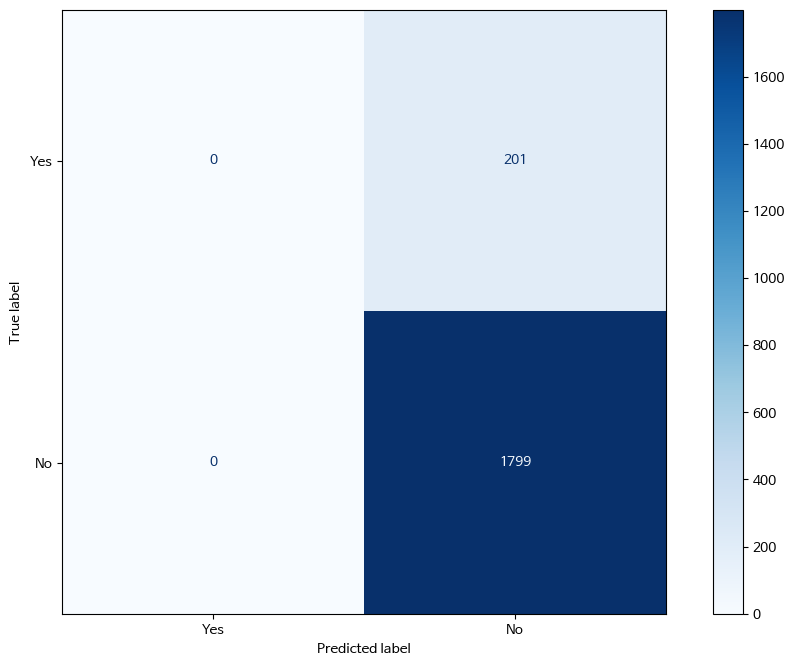

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay
p = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ('Yes', 'No') )

p.plot(cmap = 'Blues')

### 성능평가지표 구하기

#### Accuracy

In [63]:
import sklearn.metrics as metrics
metrics.accuracy_score(y_true = adult_health2_test['당뇨'], 
                       y_pred = adult_health2_test['pred'])

0.8995

점수가 높긴하나, 이것이 자료의 불균형에 기인한건지, 모델의 성능이 좋아서 그런건지 알 수 없음

#### Percision

In [65]:
metrics.precision_score(y_true = adult_health2_test['당뇨'],
                        y_pred = adult_health2_test['pred'],
                        pos_label = 'No')

0.8995

모델이 당뇨가 아니라고 예측한 사람들 중 89.9%가 아니고, 나머지 11.1%는 실제로는 당뇨인데 당뇨가 아니라고 잘못 분류한 것임.

#### Recall

In [67]:
metrics.recall_score(y_true = adult_health2_test['당뇨'],
                    y_pred = adult_health2_test['pred'],
                    pos_label = 'No')

1.0

당뇨가 아닌 사람을 100% 정확하게 예측했다. 

### 인사이트

health 데이터를 가지고 성인 당뇨병 분류 모델을 만들려고 했던 이유는, 긴 시간을 요하는 당뇨 검사를 꼭 필요한 사람들만 받을 수 있도록하는 분류 시스템을 만들면 좋을 것 같아서 였다. 당뇨병 인지 아닌지 판정하는데 수개월동안의 공복 혈액 검사가 필요하기에, 당뇨인지 아닌지만 다른 건강정보를 통해 판단할 수 있다면 유의미한 분류모델이 될 것 같아 이번 과제의 주제로 선택했다. 예측 변수는 성별, 나이, 음주, 비만으로 선정하였고, 타겟변수는 당뇨병 발병 여부로 정하였다. 당뇨병 발병 여부를 판단하는 변수는 공복 혈당을 활용하여 만들었고, 비만을 판단하는 변수는  BMI를 활용하여 만들었다. 앞서 말했듯, 이 분류 모델의 목적은 당뇨병이 아닌 사람들을 걸러내는 것이므로, 당뇨 여부'NO'를 판단하는데 주안점을 두었다. 

고안한 분류 모델을 통해 데이터를 분석해보았을 때,  정밀도, 재현율, 정확도 이 3가지 측면에서 높은 수치를 기록했다는 점에서 당뇨 여부를 판단할 때, 기초적인 건강 정보만으로도 수개월이 걸리는 당뇨 검사를 시행해야할 지 말아야 할지 판단하는 좋은 근거가 될 수 있다는 점을 알 수 있었다. 